# Tarea 1
## Nicolás Carrillo Sepúlveda


### 1. Simulación de redes sociales
Utilizando los archivos de redes en Campus Virtual, realizar un estudio de la simulación por medio de redes Erdös-Rényi, Watts.
-Strogatz, Newman-Watts-Strogatz. Se pide realizar una tabla similar a la pág 11 en la presentación en clase calculando 
el número de nodos, el grado promedio y los coeficientes de clusterización. Determinar el mejor modelo para cada ejemplo.

In [2]:
import networkx as nx
from tabulate import tabulate
citas = nx.read_edgelist("Redes_datos/citas_bibliograficas.txt")
redB = nx.read_edgelist("Redes_datos/red_biologica.txt",delimiter=",")
emails = nx.read_edgelist("Redes_datos/emails.txt",delimiter=" ")

n_citas  = nx.number_of_nodes(citas)
n_redB   = nx.number_of_nodes(redB)
n_emails = nx.number_of_nodes(emails)

p=0.9
seed=123

k_citas  = round((sum(deg for n_citas  ,deg in nx.degree(citas)) / n_citas))
k_redB   = round((sum(deg for n_redB   ,deg in nx.degree(citas)) / n_redB))
k_emails = round((sum(deg for n_emails ,deg in nx.degree(citas)) / n_emails))

citas_ER  = nx.erdos_renyi_graph(n_citas,p,seed,directed=False)
citas_WS  = nx.watts_strogatz_graph(n_citas,k_citas,p,seed)
citas_NWS = nx.newman_watts_strogatz_graph(n_citas,k_citas,p,seed)

redB_ER  = nx.erdos_renyi_graph(n_redB,p,seed,directed=False)
redB_WS  = nx.watts_strogatz_graph(n_redB,k_redB,p,seed)
redB_NWS = nx.newman_watts_strogatz_graph(n_redB,k_redB,p,seed)

emails_ER  = nx.erdos_renyi_graph(n_emails,p,seed,directed=False)
emails_WS  = nx.watts_strogatz_graph(n_emails,k_emails,p,seed)
emails_NWS = nx.newman_watts_strogatz_graph(n_emails,k_emails,p,seed)

table=[]
table.append(['Citas Bibliograficas',nx.number_of_nodes(citas),
                                    nx.average_clustering(citas_ER),
                                    nx.average_clustering(citas_WS),
                                    nx.average_clustering(citas_NWS),
                                    nx.average_clustering(citas)])
table.append(['Red Biologica',nx.number_of_nodes(redB),
                              nx.average_clustering(redB_ER),
                              nx.average_clustering(redB_WS),
                              nx.average_clustering(redB_NWS),
                              nx.average_clustering(redB)])
table.append(['Emails',nx.number_of_nodes(emails),
                       nx.average_clustering(emails_ER),
                       nx.average_clustering(emails_WS),
                       nx.average_clustering(emails_NWS),
                       nx.average_clustering(emails)])

In [4]:

print(tabulate(table,headers = ['Graph', 'n','C-ER','C-WS','C-NWS','C_actual']))

Graph                    n      C-ER        C-WS     C-NWS    C_actual
--------------------  ----  --------  ----------  --------  ----------
Citas Bibliograficas  5242  0.900108  0.00143316  0.164137   0.529636
Red Biologica         1450  0.899917  0.0135961   0.210759   0.0382951
Emails                1005  0.899788  0.0275338   0.229229   0.399355



### 2. Contagio en redes
#### - Utilice uno de los archivos Facebook de mayor número de nodos que pueda ejecutar en us computador. Se pide simular el contagio de una enfermedad tipo SIR en la red. Para ello vamos a considerar un tiempo $T$ de iteraciones del modelo y los parámetros $\beta$, $\gamma$, $N$ número de vecinos infectados. Para simplificar el problema, fijaremos la tasa de recuperados en $\gamma=0.8$  
#### 1. Definir el estado inicial de cada nodo (Sano, Infectado) considerando un random de infectados de proporción $\beta$.
#### 2. Determinar el contagio en base al número $N$ de vecinos infectados.
#### 3. En base a los contagiados, recuperar $\gamma$ de ellos de manera random.
#### 4. Calcular la proporción de sanos, infectados, recuperados y almacenar.
#### 5. Graficar los resultados después de $T=100$ iteraciones.
Considere los escenarios $\beta=0.1,0.2,0.3$ y $N=1,2,3,5$. ¿En qué escenarios se logra erradicar la enfermedad?


In [60]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import warnings
warnings.filterwarnings("ignore")

Facebook1 = nx.read_edgelist("Facebook_reducido/Facebook4000.txt")
model = ep.SIRModel(Facebook1)

b = [0.1 , 0.2 , 0.3]
N = [1 , 2 , 3 , 5 ]
gamma = 0.8
T = 8 #100
viz = 0
mp = MultiPlot()
for beta in b:
    for Ns in N:
        f_infectados = Ns/nx.number_of_nodes(Facebook1)
        config = mc.Configuration()
        config.add_model_parameter('beta',beta)
        config.add_model_parameter('gamma',gamma)
        config.add_model_parameter('f_infectados',f_infectados)
        model.set_initial_status(config)
        iteraciones = model.iteration_bunch(T)
        trends = model.build_trends(iteraciones)

        viz = DiffusionTrend(model, trends)
        mp.add_plot(viz.plot(width=600, height=400))
        model.get_info()
        model.reset()
show(mp.plot())

100%|██████████| 8/8 [00:00<00:00, 95.84it/s]



### Bonus: Programar el modelo SIS y ajustar los parámetros a los datos de contagio del covid-19 $\beta,\gamma$ y estimar $N$ para simular la propagación en redes del virus.



In [61]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

Facebook1 = nx.read_edgelist("Facebook_reducido/Facebook4000.txt")
model = ep.SISModel(Facebook1)
#buscar valores para beta, gamma y N
b = 0.01
N = 5
l = 0.08
T = 100
mp = MultiPlot()
f_infectados = N/nx.number_of_nodes(Facebook1)
config = mc.Configuration()
config.add_model_parameter('beta',b)
config.add_model_parameter('lambda',l)
config.add_model_parameter('f_infectados',f_infectados)
model.set_initial_status(config)

iteraciones = model.iteration_bunch(T)
trends = model.build_trends(iteraciones)
viz = DiffusionTrend(model, trends)
mp.add_plot(viz.plot(width=600, height=400))
show(mp.plot())

100%|██████████| 100/100 [00:01<00:00, 54.82it/s]


### 3. Marketing viral
#### Nuevamente utilizamos el archivo Facebook de mayor tamaño. Similar al caso anterior, definiremos un conjunto inicia de recomendadores de dos maneras: random con proporciones 0.1, 0.2 y el 10% y 20% de los nodos más influyentes (mayores grados).
#### 1. Definir el estado de cada nodo en Influencer y No influencer.
#### 2. crear un grafo dirigido de las influencias en base a $N=2,3,5$ recomendaciones y hacer la dinámica hasta que no queden nodos por influenciar. Considerar un 10% y 20%  de influenciados que cambian de estado.
### 3. En base a cada grafo dirigido, encontrar las cascadas más comunes.



### 4. Ley de potencia
#### Utilizando los archivos de redes, 

#### 1. Ajustar la potencia para modelar la distribución de grados de cada ejemplo

#### 2. Averiguar sobre las redes de Barabási-Albert para modelar grafos del de potencia

![] (https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Barabasi_Albert_1000nodes.png/263px-Barabasi_Albert_1000nodes.png)

* Las redes de Barabási-Albert son un algoritmo empleado para generar redes aleatorias complejas libres de escala empleando una regla o mecanismo denominado "Conexión Preferencial" (es el proceso mediante el cual se agina una propiedad a un conjunto o poblacion).
* Estas redes mencionadas anteriormente tienen una distribucion de grado (grado de conexiones de un nodo) de tipo potencial y son denominadas "redes libres de escalas". Estas son frecuentes en los sistemas elaborados por la naturaleza y por el humano. Algnos ejemplos conocidos son el WWW (World wide Web), redes de citas, redes sociales y redes electricas.




#### 3. Ajustar un grafo de Barabási-Albert para cada modelo calibrando el parámetro de arcos nuevo



In [26]:
import networkx as nx
Facebook1 = nx.read_edgelist("Facebook_reducido/Facebook100.txt")

n = nx.number_of_nodes(Facebook1)
k = round((sum(deg for n,deg in nx.degree(Facebook1)) / n))
p=0.3
seed = 123
edge = 1 #Numero de conexiones que puede tener un nodo

ER  = nx.erdos_renyi_graph(n,p,seed,directed=False)
WS  = nx.watts_strogatz_graph(n,k,p,seed)
NWS = nx.newman_watts_strogatz_graph(n,k,p,seed)

BA = nx.barabasi_albert_graph(n,1,seed)


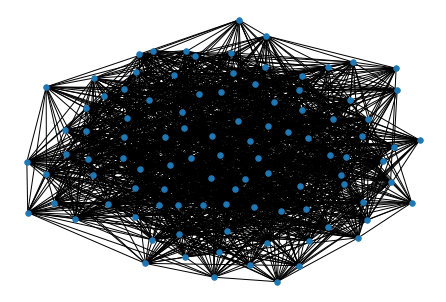

In [45]:
nx.draw(ER,node_size=30)

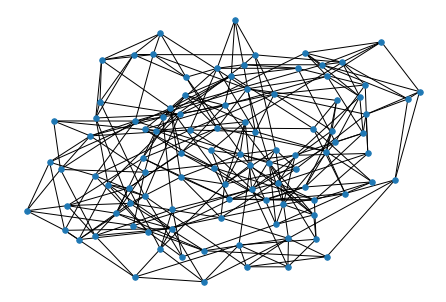

In [46]:
nx.draw(WS,node_size=30)

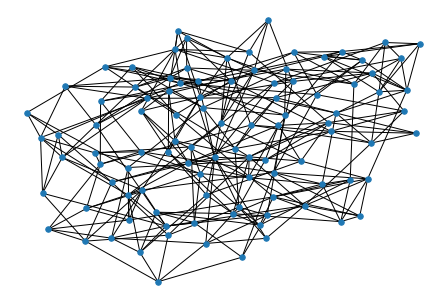

In [47]:
nx.draw(WS,node_size=30)

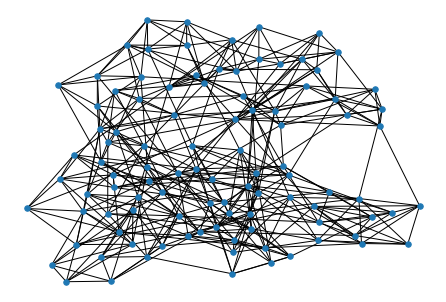

In [48]:
nx.draw(NWS,node_size=30)

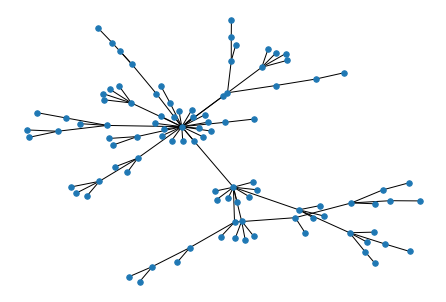

In [50]:
nx.draw(BA,node_size=30)

### Bonus: leer y comentar el artículo 
Scale-free networks are rare, Anna D. Broido & Aaron Clauset, Nature Communications volume 10, Article number: 1017 (2019)
https://www.nature.com/articles/s41467-019-08746-5
